In [5]:
# -*- coding: utf-8 -*-
## Exemplo de Criação de um modelo de Previsão/Classificação usando as Arvores de Decisão
## Example of Creating a Forecast/Classification model using Decision Trees

## import
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


## carregar o ficheiro Insol para um dataframe do pandas dInsol
## load the Insol file into a pandas dInsol dataframe
dInsol = pd.read_csv('../files/View_data_nullZero.csv')



dInsol.head(2)     #Mostra as primeiras n linhas do conjunto de dados
dInsol.tail(5)     #Mostra as últimas n linhas do conjunto de dados

dInsol.shape



(43823, 50)

In [21]:
x = dInsol.iloc[:,1:50] # 1t for rows and second for columns
x


,t1_all_total5_fl_match_win,t1_all_total5_fl_match_draw,t1_all_total5_fl_match_lost,t1_all_total10_fl_match_win,t1_all_total10_fl_match_draw,t1_all_total10_fl_match_lost,t2_all_total5_fl_match_win,t2_all_total5_fl_match_draw,t2_all_total5_fl_match_lost,t2_all_total10_fl_match_win,...,t1_h2h_home_total10_fl_match_win,t1_h2h_home_total10_fl_match_draw,t1_h2h_home_total10_fl_match_lost,t2_h2h_away_total5_fl_match_win,t2_h2h_away_total5_fl_match_draw,t2_h2h_away_total5_fl_match_lost,t2_h2h_away_total10_fl_match_win,t2_h2h_away_total10_fl_match_draw,t2_h2h_away_total10_fl_match_lost,t1_fl_match_win
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43818,1,4,0,3,6,1,3,1,1,3,...,0,1,0,0,1,0,0,1,0,0
43819,2,1,2,4,2,4,2,1,2,2,...,0,0,0,0,0,0,0,0,0,1
43820,1,3,1,5,3,2,3,0,2,5,...,2,2,0,0,2,2,0,2,2,1
43821,1,1,3,1,4,5,1,2,2,4,...,1,2,2,2,2,1,2,2,1,0


In [22]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [23]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, ..., 2, 0, 1], dtype=int32)

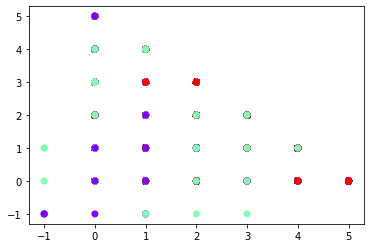

In [27]:
data_with_clusters = dInsol.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['t1_all_total5_fl_match_win'],data_with_clusters['t1_all_total5_fl_match_draw'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

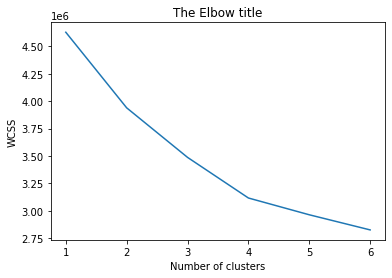

In [26]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')